<a href="https://colab.research.google.com/github/axdecimal/CNNmodelling/blob/master/CNNSem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
zip_adres = "/content/drive/MyDrive/Colab Notebooks/CNNSem.zip"
!cp "{zip_adres}" .

In [25]:
!unzip \*.zip  && rm *.zip

In [27]:
import os
import cv2
from tqdm import tqdm

KATEGORILER = ["Pollen", "tapetal"]
DIR = "CNNSem"
BOYUT = 512

veri = []

for kategori in KATEGORILER:
  klasor_adresi = os.path.join(DIR,kategori)
  deger = KATEGORILER.index(kategori)
  for resim_adi in tqdm(os.listdir(klasor_adresi)):
    resim_adresi = os.path.join(klasor_adresi,resim_adi)
    resim = cv2.imread(resim_adresi, cv2.IMREAD_COLOR)
    if(resim is None):
      print("None")
    else:
      resim = cv2.resize(resim,(BOYUT,BOYUT))
      veri.append([resim,deger])

 50%|█████     | 2/4 [00:00<00:00, 12.86it/s]

None


100%|██████████| 4/4 [00:00<00:00, 12.45it/s]


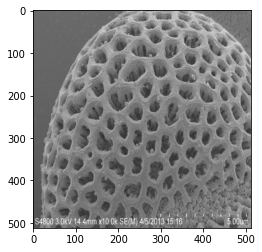

In [30]:
from matplotlib import pyplot
pyplot.imshow(cv2.cvtColor(veri[2][0], cv2.COLOR_BGR2RGB))

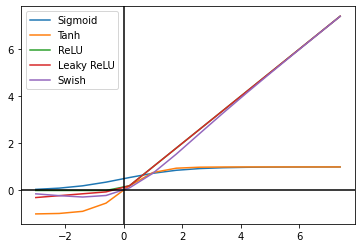

In [ ]:
# Gerekli kütüphanelerin import edilmesi
import math
import matplotlib.pyplot as plt
import numpy as np

# Aktivasyon fonksiyonlarının tanımlamalarının matematiksel olarak yapılması
# Sigmoid Fonksiyonu
def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return a
# Hiperbolik Tanjant Fonksiyonu
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)
# ReLU Fonksiyonu
def re(x):
    b = []
    for i in x:
        if i<0:
            b.append(0)
        else:
            b.append(i)
    return b
# Leaky ReLU Fonksiyonu
def lr(x):
    b = []
    for i in x:
        if i<0:
            b.append(i/10)
        else:
            b.append(i)
    return b
  
# Grafik için oluşturulacak aralıkların belirlenmesi
x = np.arange(-3., 8., 0.8)
sig = sigmoid(x)
tanh = tanh(x)
relu = re(x)
leaky_relu = lr(x)
swish = sig*x

#Fonksiyonların ekrana çizilmesi ve gösterilmesi
line_1, = plt.plot(x,sig, label='Sigmoid')
line_2, = plt.plot(x,tanh, label='Tanh')
line_3, = plt.plot(x,relu, label='ReLU')
line_4, = plt.plot(x,leaky_relu, label='Leaky ReLU')
line_5, = plt.plot(x,swish, label='Swish')
plt.legend(handles=[line_1, line_2, line_3, line_4, line_5])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [ ]:
import random
random.shuffle(veri)

X = []
Y = []

for x,y in veri:
  X.append(x)
  Y.append(y)

del veri

1


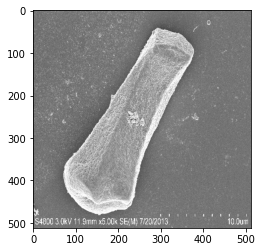

In [ ]:
pyplot.imshow(cv2.cvtColor(X[3], cv2.COLOR_BGR2RGB))
print(Y[7])

In [ ]:
import numpy

X = numpy.array(X).reshape(-1,BOYUT,BOYUT,3)
Y = numpy.array(Y).reshape(-1,1)

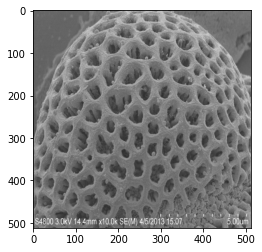

In [ ]:
pyplot.imshow(cv2.cvtColor(X[2], cv2.COLOR_BGR2RGB),cmap='gray')

In [ ]:
X = X / 255.0

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Flatten, Dense, MaxPool2D

model = Sequential()
model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=X[0].shape,activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['acc'])

mc = ModelCheckpoint('en_iyi.h5',save_best_only=True,monitor='val_loss',mode='min')

model.fit(X,Y,batch_size=32,epochs=100,shuffle=True,validation_split=0.2,callbacks=[mc])

ValueError: ignored

1.0


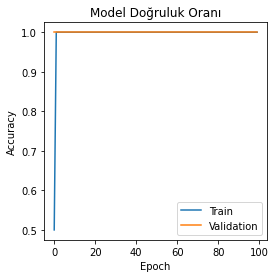

In [ ]:
from matplotlib import pyplot

pyplot.figure(figsize=(4,4))
pyplot.plot(model.history.history['acc'])
pyplot.plot(model.history.history['val_acc'])
pyplot.title('Model Doğruluk Oranı')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Train','Validation'], loc='lower right')
pyplot.savefig('sema.png',dpi=300)
print(max(model.history.history['val_acc']))

In [ ]:
# mevcut modeli kayıt eder
model.save('model.h5')

In [ ]:
from tensorflow.keras.models import load_model
yuklenen_model = load_model('en_iyi.h5')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y,yuklenen_model.predict(X).round()))
print(classification_report(Y,yuklenen_model.predict(X).round()))

[[4 0]
 [0 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



[1.]


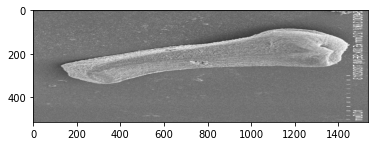

In [ ]:
print(yuklenen_model.predict(X)[1])
pyplot.imshow(numpy.column_stack(X[1]),cmap='gray')